In [ ]:
## replace the ones that are somehow wrong with the training data used in the awake output files (sacred directory... then rerun the shuffle)


## For each recording, take synthetic spikes (standard) and shuffle in a circular manner (random spin across the whole recording) 
# save out the shuffled spikes read for a ppseq run. 


# I think it may be better to load in the original spikes, and then shuffle them, 
# # rather than loading in the synthetic spikes...If fact this is the only way to do it.

# then to analyse them I need to see how many false positives per min? or maybe check to see if it still finds the orgional sequences...
# maybe both and discount those that are correct. 

In [240]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def circular_shift(group,time_range):
    # Calculate the range of timestamps for the current neuron
    timestamp_range = group['timestamp'].max() - group['timestamp'].min()
    # Generate a random shift amount between -half the range and half the range
    # shift_amount = np.random.uniform(-timestamp_range / 2, timestamp_range / 2)
    shift_amount = np.random.uniform(0, time_range)
    # Apply the circular shift
    group['timestamp'] = (group['timestamp'] + shift_amount) % timestamp_range 
    
    return group


# Path = r"Z:\projects\sequence_squad\organised_data\ppseq_data\prepared_data\striatum\Awake\ppseq_ready\\"
Path = r"D:\circular_shuffle\retry\\"

for mouse_rec_imp in os.listdir(Path):
    if '.txt' in mouse_rec_imp:
        spikes_file = os.path.join(Path, mouse_rec_imp) 
        # load in the txt file
        print(mouse_rec_imp)
        spikes_df = pd.read_csv(spikes_file, sep='\t', header=None)

        # rename spikes df columns 
        spikes_df.columns = ['neuron', 'timestamp']
        # find range:
        time_range = round(max(spikes_df.timestamp.values))
        # Apply the circular shift to each neuron group
        spikes_df_shifted = spikes_df.groupby('neuron').apply(circular_shift, time_range=time_range)
        # Reset the index to flatten the MultiIndex created by groupby
        spikes_df_shifted = spikes_df_shifted.reset_index(drop=True)
        #Reorder the spikes for each neuron so that they are in time order
        spikes_df_shifted = spikes_df_shifted.sort_values(by=['neuron', 'timestamp']).reset_index(drop=True)
        
        spikes_df_shifted.to_csv(r'D:\circular_shuffle\retry\shuffled\\' + mouse_rec_imp + '.txt', sep='\t', index=False, header=False)
        
        print('done')
        


136_1_3.txt


C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_36168\4207085591.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  spikes_df_shifted = spikes_df.groupby('neuron').apply(circular_shift, time_range=time_range)


done
178_1_6.txt


C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_36168\4207085591.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  spikes_df_shifted = spikes_df.groupby('neuron').apply(circular_shift, time_range=time_range)


done
178_1_7.txt


C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_36168\4207085591.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  spikes_df_shifted = spikes_df.groupby('neuron').apply(circular_shift, time_range=time_range)


done
178_2_2.txt


C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_36168\4207085591.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  spikes_df_shifted = spikes_df.groupby('neuron').apply(circular_shift, time_range=time_range)


done
178_2_4.txt
done


C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_36168\4207085591.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  spikes_df_shifted = spikes_df.groupby('neuron').apply(circular_shift, time_range=time_range)


In [232]:
path1 = r"D:\circular_shuffle\\"
path2 = r"D:\circular_shuffle\retry\\"

for item in os.listdir(path2):
    if '.txt' in item:
        c_path = os.path.join(path1, item)
        c = pd.read_csv(c_path, sep='\t', header=None)
        c2_path = os.path.join(path2, item)
        c2 = pd.read_csv(c2_path, sep='\t', header=None)
        print(item)
    break

178_2_4.txt


In [233]:
c

,0,1
0,1.0,0.0014
1,1.0,0.0435
2,1.0,0.0648
3,1.0,0.1075
4,1.0,0.1581
...,...,...
309806,90.0,1950.6733
309807,90.0,1951.3477
309808,90.0,1956.1547
309809,90.0,1958.7276


In [234]:
c2

,0,1
0,1.0,0.0075
1,1.0,0.2345
2,1.0,0.2599
3,1.0,0.3169
4,1.0,0.6145
...,...,...
87665,118.0,582.9712
87666,118.0,584.7357
87667,118.0,587.5325
87668,118.0,593.4364


'270_1_3'

In [201]:
spikes_file

'D:\\circular_shuffle\\\\270_1_3.txt'

In [107]:
# save out shifted spikes as a txt file for ppseq

def write_text_file(bound_spikes, filename="spikeData.txt"):
    f = open(filename, "w")
    for i, spike_train in enumerate(bound_spikes):
        for t, spike_time in enumerate(spike_train):
            mssg = "{:.1f}\t{:10.4f}\n".format(i + 1, spike_time)
            f.write(mssg)
    f.close()
    return filename

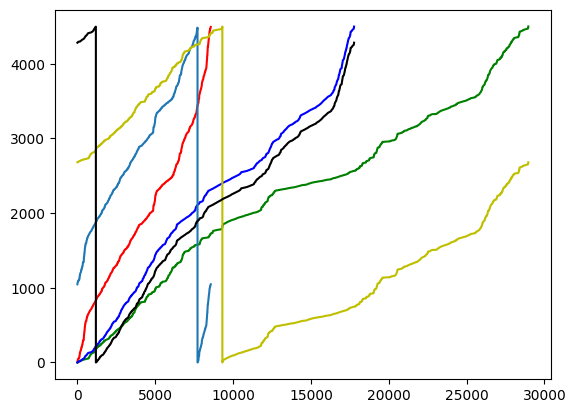

In [150]:
plt.plot(spikes_df[spikes_df.neuron == 1].timestamp.values,c = 'r')
plt.plot(spikes_df[spikes_df.neuron == 30].timestamp.values, c = 'g')
plt.plot(spikes_df[spikes_df.neuron == 100].timestamp.values, c = 'b')

plt.plot(spikes_df_shifted[spikes_df_shifted.neuron == 1].timestamp.values)
plt.plot(spikes_df_shifted[spikes_df_shifted.neuron == 30].timestamp.values, c = 'y')
plt.plot(spikes_df_shifted[spikes_df_shifted.neuron == 100].timestamp.values,c = 'k')

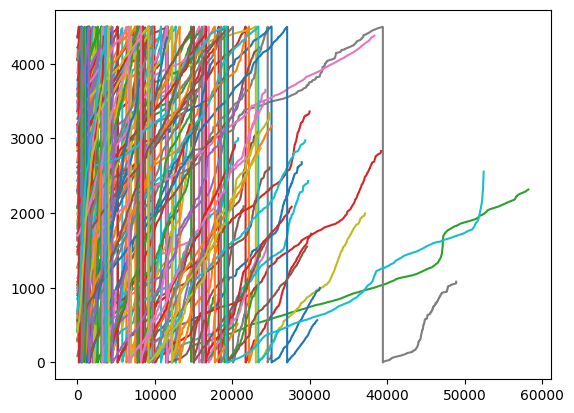

In [147]:
for i in range(100):
    plt.plot(spikes_df_shifted[spikes_df_shifted.neuron == i].timestamp.values)

In [123]:
spikes_df_shifted

,neuron,timestamp
0,1.0,0.879656
1,1.0,0.887056
2,1.0,0.903156
3,1.0,0.925556
4,1.0,0.989156
...,...,...
1738479,103.0,4495.413391
1738480,103.0,4495.891191
1738481,103.0,4497.846391
1738482,103.0,4498.101091


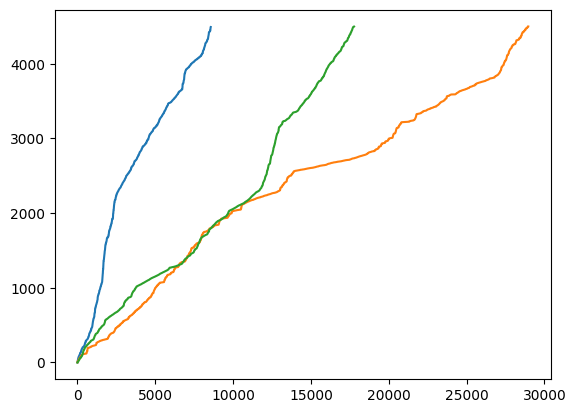

In [83]:
spikes_df_shifted[spikes_df_shifted.neuron == 100].timestamp

437028    1836.927859
437029    1837.762359
437030    1837.775959
437031    1837.839159
437032    1837.852359
             ...     
445969    1835.559259
445970    1835.843059
445971    1836.005959
445972    1836.112259
445973    1836.927859
Name: timestamp, Length: 8946, dtype: float64

In [47]:

ppseq_events = pd.read_pickle(r"Z:\projects\Emmett\synthetic_data_rerun\synthetic_spikes\136_1_3\standard_insertion\ppseq_events.pkl")

,neuron,timestamp
0,1.0,0.189217
1,1.0,0.692617
2,1.0,0.701317
3,1.0,1.792817
4,1.0,1.863117
...,...,...
72584,73.0,541.781617
72585,73.0,547.209617
72586,73.0,547.310617
72587,73.0,547.883817
